Analyzing probability of being in each state after different numbers of steps:


After 1 steps:
Transition matrix P^{n}:
[[0.25       0.         0.75       0.         0.        ]
 [0.         0.33333333 0.         0.66666667 0.        ]
 [0.         0.         0.5        0.         0.5       ]
 [0.5        0.16666667 0.         0.33333333 0.        ]
 [0.25       0.         0.5        0.         0.25      ]]

Probability of being in closed class {1,3,5}:
Starting from state 1: 1.0000
Starting from state 2: 0.0000
Starting from state 3: 1.0000
Starting from state 4: 0.5000
Starting from state 5: 1.0000

After 10 steps:
Transition matrix P^{n}:
[[0.11764622 0.         0.52941227 0.         0.35294151]
 [0.12691138 0.00867076 0.51337498 0.01734153 0.33370134]
 [0.11764717 0.         0.52941132 0.         0.35294151]
 [0.12228023 0.00433538 0.52139506 0.00867076 0.34331857]
 [0.11764717 0.         0.52941227 0.         0.35294056]]

Probability of being in closed class {1,3,5}:
Starting fr

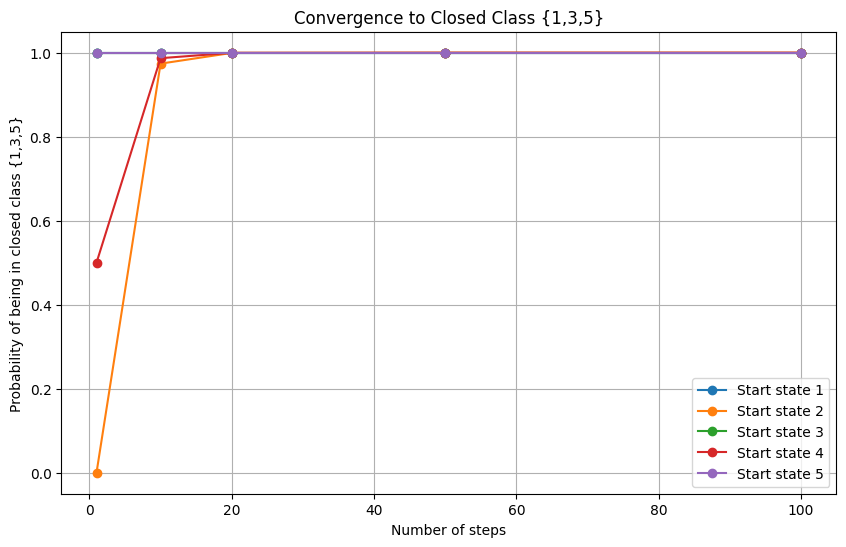

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def n_step_transition(P, n):
    """
    Calculate n-step transition probabilities
    Args:
        P: transition matrix
        n: number of steps
    Returns:
        P^n: n-step transition matrix
    """
    return np.linalg.matrix_power(P, n)

def analyze_long_term_behavior(P, steps=[1, 10, 20, 50, 100]):
    """
    Analyze the long-term behavior of the Markov chain by examining
    transition probabilities at different steps and tracking the 
    probability mass in different classes.
    """
    # Initial transition matrix
    P = np.array(P)
    
    # Track probabilities for each state starting from different initial states
    results = {}
    
    print("Analyzing probability of being in each state after different numbers of steps:\n")
    
    for n in steps:
        P_n = n_step_transition(P, n)
        print(f"\nAfter {n} steps:")
        print("Transition matrix P^{n}:")
        print(P_n)
        
        # Calculate probability of being in closed class {1,3,5} vs open class {2,4}
        closed_class_prob = np.sum(P_n[:, [0,2,4]], axis=1)
        open_class_prob = np.sum(P_n[:, [1,3]], axis=1)
        
        print("\nProbability of being in closed class {1,3,5}:")
        for i in range(5):
            print(f"Starting from state {i+1}: {closed_class_prob[i]:.4f}")
            
        results[n] = closed_class_prob
        
    return results

# Define transition matrix
P = np.array([[1/4, 0, 3/4, 0, 0],
              [0, 1/3, 0, 2/3, 0],
              [0, 0, 1/2, 0, 1/2],
              [1/2, 1/6, 0, 1/3, 0],
              [1/4, 0, 1/2, 0, 1/4]])

# Analyze behavior over different time steps
steps = [1, 10, 20, 50, 100]
results = analyze_long_term_behavior(P, steps)

# Plot the convergence
plt.figure(figsize=(10, 6))
for i in range(5):
    probs = [results[n][i] for n in steps]
    plt.plot(steps, probs, marker='o', label=f'Start state {i+1}')

plt.xlabel('Number of steps')
plt.ylabel('Probability of being in closed class {1,3,5}')
plt.title('Convergence to Closed Class {1,3,5}')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import numpy as np

def compute_transition_probability(P, initial_distribution=None, steps=1, target_state=None):
    """
    Computes the probability of transitioning to a given state after a number of steps
    for a Markov chain defined by a transition matrix.
    
    Parameters:
    - P (ndarray): Transition matrix (NxN numpy array).
    - initial_distribution (list or ndarray, optional): Initial distribution over states. 
      Defaults to uniform distribution if None.
    - steps (int): Number of steps to transition (default: 1).
    - target_state (int, optional): The target state to compute the probability for. 
      If None, returns the full distribution after the given steps.
      
    Returns:
    - float (if target_state is specified): Probability of being in the target state after `steps`.
    - ndarray (if target_state is None): Full distribution after `steps`.
    """
    
    
    # Ensure the input matrix is valid
    P = np.array(P)
    assert P.shape[0] == P.shape[1], "Transition matrix must be square."
    

    n_states = P.shape[0]
    if initial_distribution is None:
        initial_distribution = np.full(n_states, 1 / n_states)
    else:
        initial_distribution = np.array(initial_distribution)
        assert len(initial_distribution) == n_states, "Initial distribution size must match the number of states."
    
   
    P_n = np.linalg.matrix_power(P, steps)
    
    
    final_distribution = np.dot(initial_distribution, P_n)
    
    if target_state is not None:
        assert 0 <= target_state < n_states, "Target state must be a valid state index."
        return final_distribution[target_state]
    
    # Return the full distribution otherwise
    return final_distribution

# Example usage:
P2 = [
    [1/4, 0, 3/4, 0, 0],
    [0, 1/3, 0, 2/3, 0],
    [0, 0, 1/2, 0, 1/2],
    [1/2, 1/6, 0, 1/3, 0],
    [1/4, 0, 1/2, 0, 1/4]
]

# Probability distribution after 2 steps starting from state 1 (index 0)
compute_transition_probability(P2, initial_distribution=[1, 0, 0, 0, 0], steps=2, target_state=2)

# Full distribution after 3 steps starting from uniform distribution
compute_transition_probability(P2, steps=3)


array([0.16666667, 0.04444444, 0.446875  , 0.08888889, 0.253125  ])